# Baseball Case Study

# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from scipy import stats
import stat

In [2]:
data=pd.read_csv('baseball.csv')

In [3]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [4]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
data=data.astype({'ERA':'int64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       30 non-null     int64
 1   R       30 non-null     int64
 2   AB      30 non-null     int64
 3   H       30 non-null     int64
 4   2B      30 non-null     int64
 5   3B      30 non-null     int64
 6   HR      30 non-null     int64
 7   BB      30 non-null     int64
 8   SO      30 non-null     int64
 9   SB      30 non-null     int64
 10  RA      30 non-null     int64
 11  ER      30 non-null     int64
 12  ERA     30 non-null     int64
 13  CG      30 non-null     int64
 14  SHO     30 non-null     int64
 15  SV      30 non-null     int64
 16  E       30 non-null     int64
dtypes: int64(17)
memory usage: 4.1 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.0,74.00,81.0,87.75,100.0
R,30.0,688.233333,58.761754,573.0,651.25,689.0,718.25,891.0
AB,30.0,5516.266667,70.467372,5385.0,5464.00,5510.0,5570.00,5649.0
H,30.0,1403.533333,57.140923,1324.0,1363.00,1382.5,1451.50,1515.0
2B,30.0,274.733333,18.095405,236.0,262.25,275.5,288.75,308.0
3B,30.0,31.300000,10.452355,13.0,23.00,31.0,39.00,49.0
HR,30.0,163.633333,31.823309,100.0,140.25,158.5,177.00,232.0
BB,30.0,469.100000,57.053725,375.0,428.25,473.0,501.25,570.0
SO,30.0,1248.200000,103.759470,973.0,1157.50,1261.5,1311.50,1518.0
SB,30.0,83.500000,22.815225,44.0,69.00,83.5,96.50,134.0


No need to change the datatype they are appropriate so we can skip the step of data conversion Now directly jumps to EDA.

# EDA

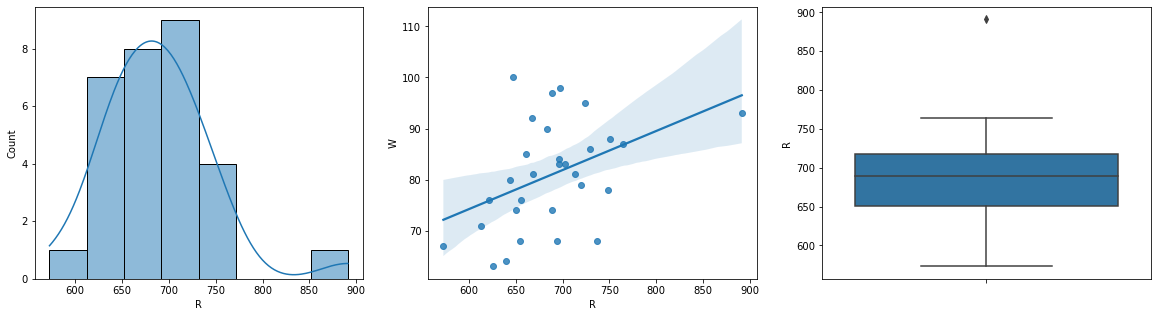

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='R',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='R',data=data)
plt.show()

Run and win are linearly correlated. And outliers are present between 850 and 900

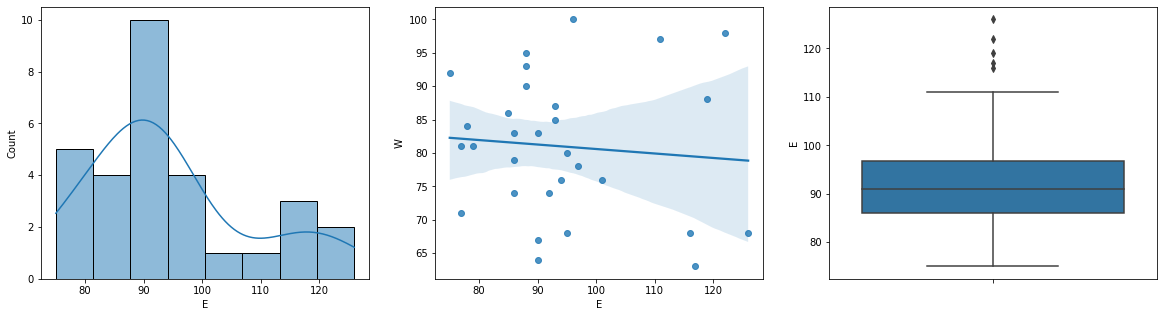

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='E',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='E',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='E',data=data)
plt.show()

Errors are not correlated to win, the data has outliers and data is right-skewed.
               
                  
                    
                      
                       

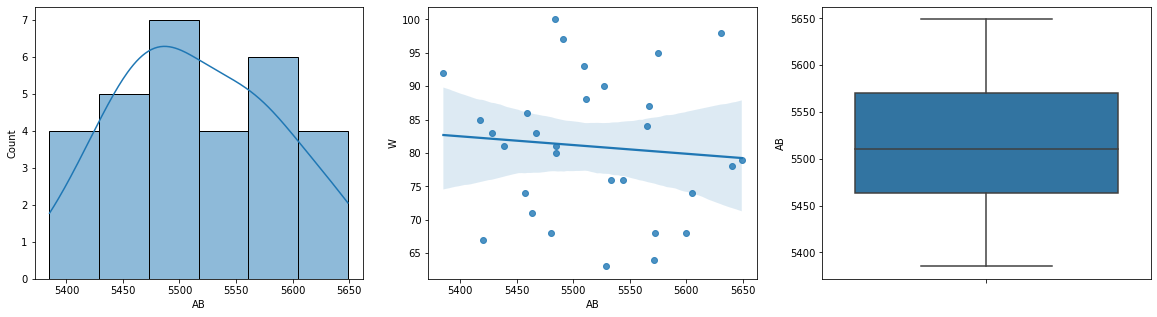

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='AB',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='AB',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='AB',data=data)
plt.show()

At balls is very weekly related to Wins With no outliers.

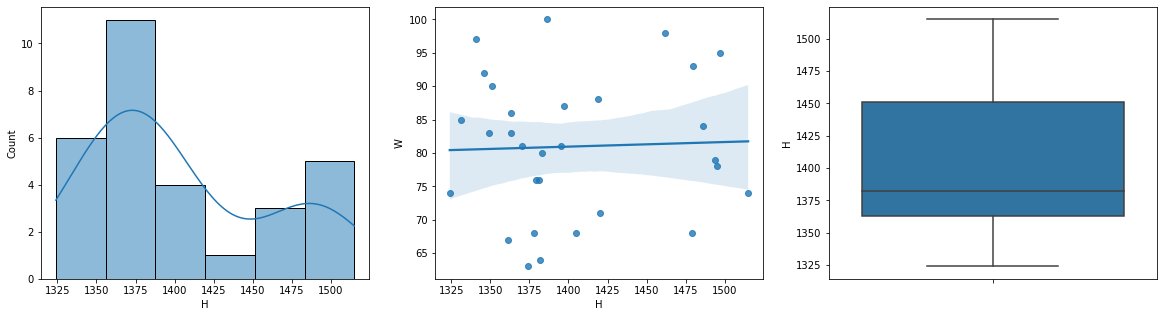

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='H',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='H',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='H',data=data)
plt.show()

Hits are also very weekly related to winning with no outliers

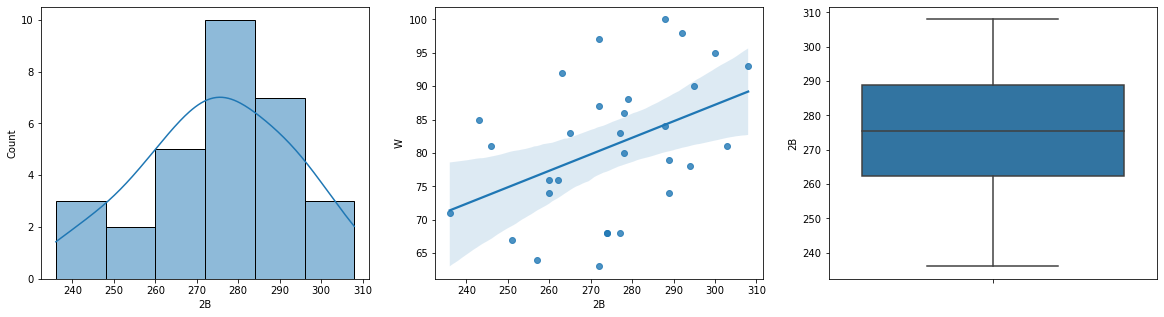

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='2B',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='2B',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='2B',data=data)
plt.show()

Doubles are linearly related with Wins, with no outlier, and data is left-skewed

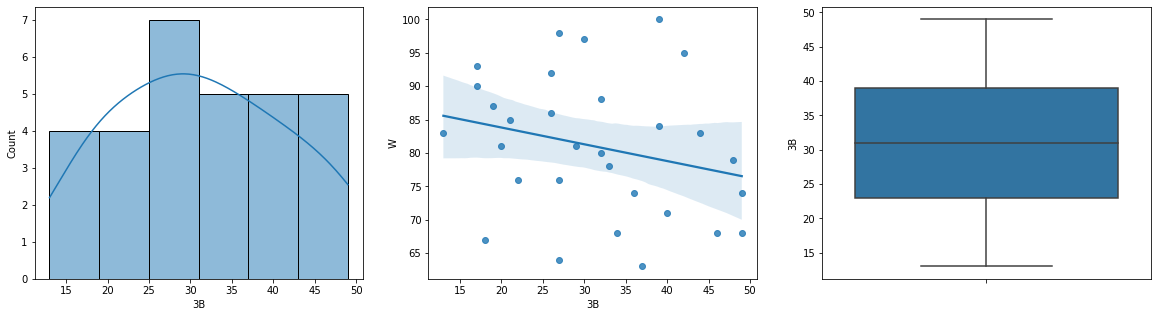

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='3B',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='3B',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='3B',data=data)
plt.show()

Triple has very weak negative correlations with win with no outlier and data is right-skewed

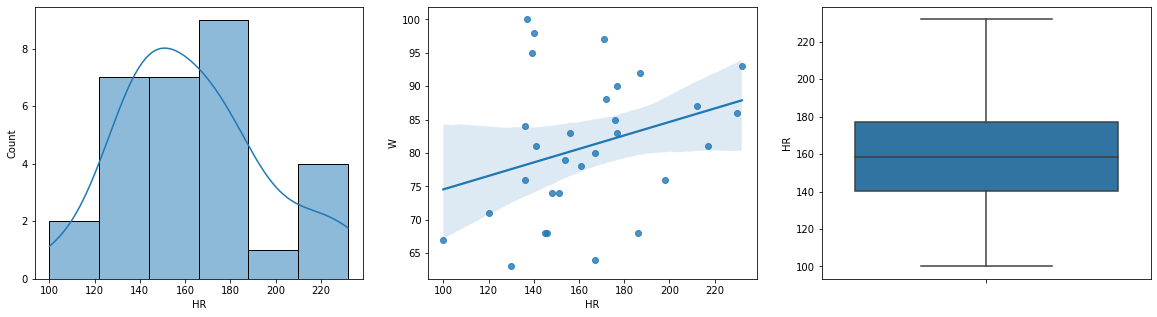

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='HR',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='HR',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='HR',data=data)
plt.show()

The home run has a very low correlation with wins with no lot of outliers and data is right-skewed

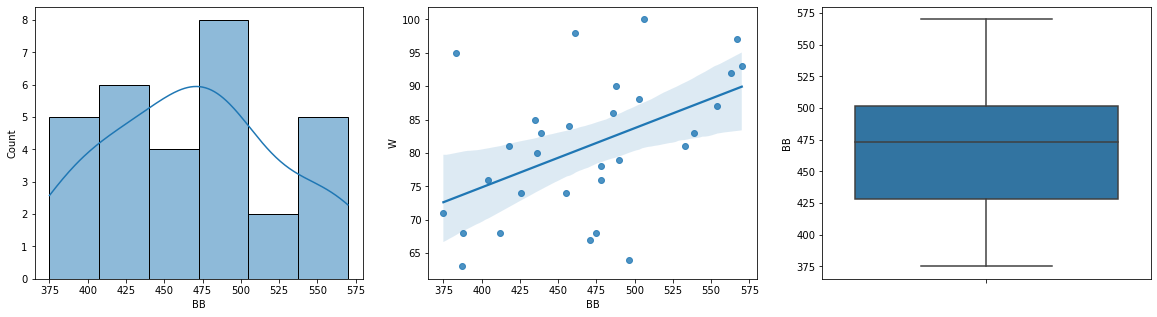

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='BB',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='BB',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='BB',data=data)
plt.show()

Walk is lightly correlated to win with no outlier

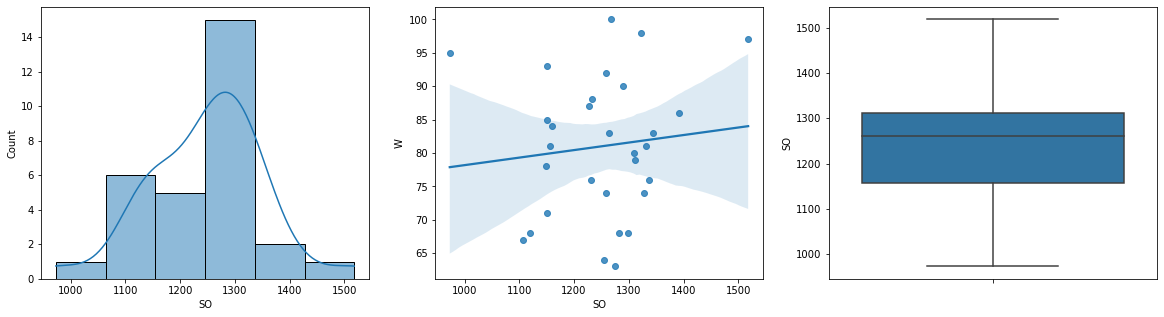

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SO',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SO',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='SO',data=data)
plt.show()

Strikeout is not correlated to win with no outlier and the dataset is left-skewed.

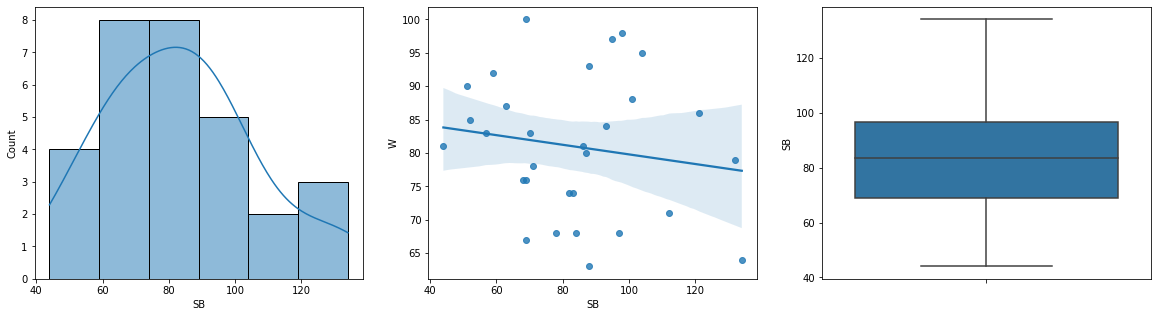

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SB',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SB',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='SB',data=data)
plt.show()

Stolen Bases is not correlated to win with no outlier

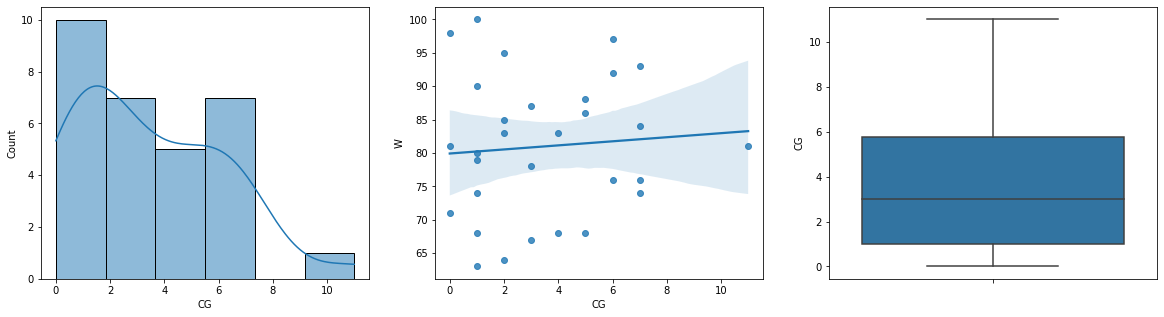

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='CG',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='CG',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='CG',data=data)
plt.show()

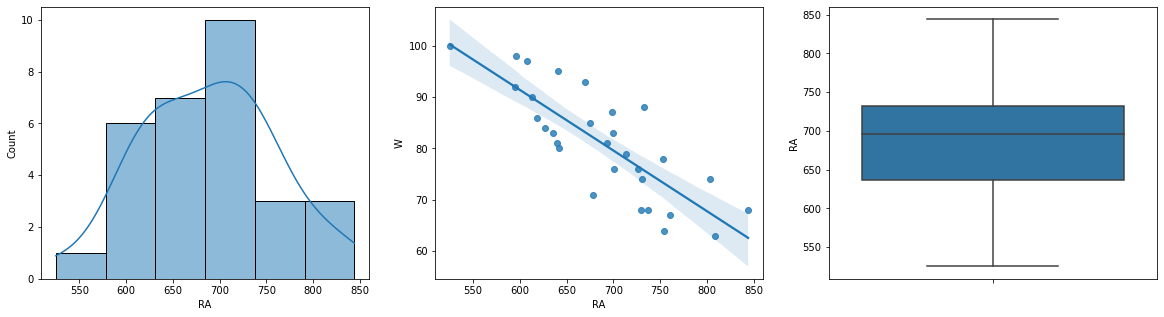

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='RA',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='RA',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='RA',data=data)
plt.show()

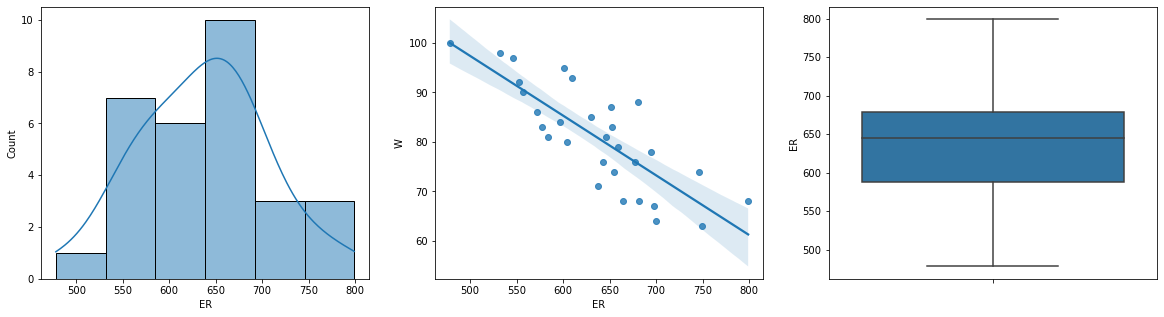

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ER',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='ER',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='ER',data=data)
plt.show()

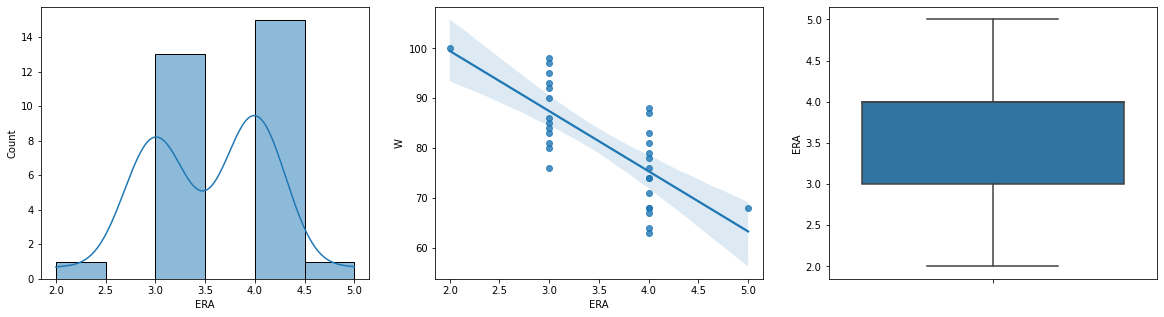

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ERA',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='ERA',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='ERA',data=data)
plt.show()

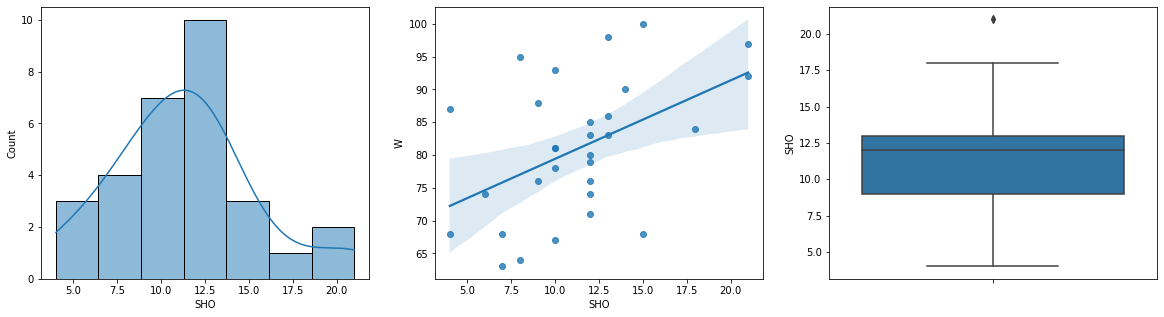

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SHO',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SHO',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='SHO',data=data)
plt.show()

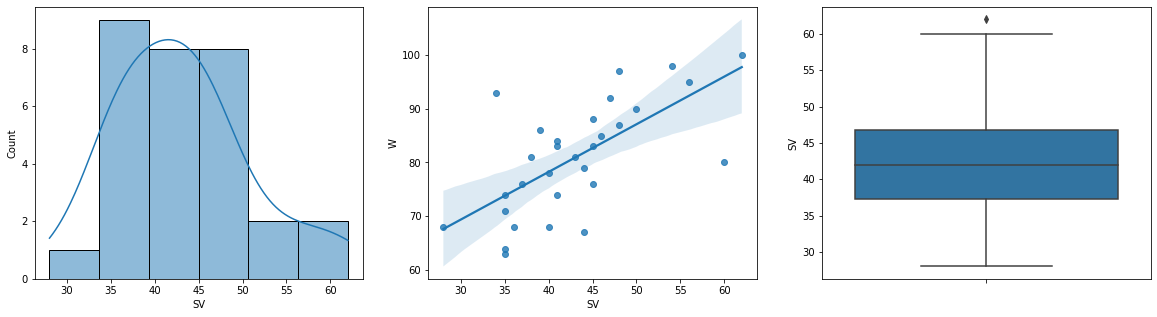

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SV',data=data,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SV',y='W',data=data)
plt.subplot(1,3,3)
sns.boxplot(y='SV',data=data)
plt.show()

<AxesSubplot:>

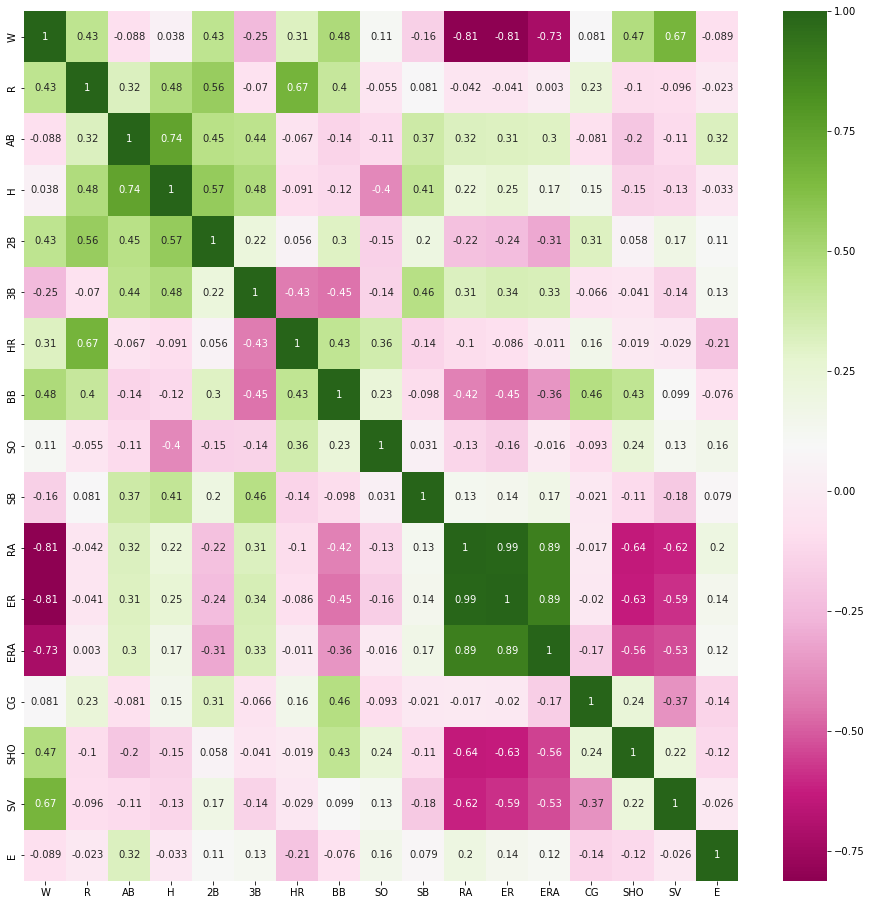

In [24]:
# Calculate correlations
corr = data.corr()
 
# Heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True,cmap='PiYG')

From Above Graph we can see that:-


1)The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated.

2)Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

3)The remaining features have less to no linear correlation with no of Wins

In [25]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA   -0.133406
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

The best skew value for normally distributes is very close to zero. So for all columns which have skewness near to 1 which is bad skewness, hence droping the related columns.

In [26]:
# drop out features that give out useless information
data = data.drop(columns = ['CG', 'H', 'E'])
data

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,95,724,5575,300,42,139,383,973,104,641,601,3,8,56
1,83,696,5467,277,44,156,439,1264,70,700,653,4,12,45
2,81,669,5439,303,29,141,533,1157,86,640,584,3,10,38
3,76,622,5533,260,27,136,404,1231,68,701,643,3,9,37
4,74,689,5605,289,49,151,455,1259,83,803,746,4,12,35
5,93,891,5509,308,17,232,570,1151,88,670,609,3,10,34
6,87,764,5567,272,19,212,554,1227,63,698,652,4,4,48
7,81,713,5485,246,20,217,418,1331,44,693,646,4,10,43
8,80,644,5485,278,32,167,436,1310,87,642,604,3,12,60
9,78,748,5640,294,33,161,478,1148,71,753,694,4,10,40


# Model training and performance evaluation

In [28]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['W'])
y = data[["W"]]
print(x.shape)
print(y.shape)

(30, 13)
(30, 1)


In [29]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [30]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(0,100):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  0 is -0.3716974303293521
R2 score correspond to random state  0 is 0.5151646760767286
R2 score correspond to random state  0 is -0.06007292127451369
R2 score correspond to random state  0 is 0.4614542549625754
R2 score correspond to random state  0 is -0.3249935035317131
R2 score correspond to random state  1 is -0.2435400516795867
R2 score correspond to random state  1 is 0.4507428940568474
R2 score correspond to random state  1 is 0.5012590668564774
R2 score correspond to random state  1 is 0.4714200235425017
R2 score correspond to random state  1 is -0.053684242810336125
R2 score correspond to random state  2 is 0.6310001027854867
R2 score correspond to random state  2 is 0.4348853941823415
R2 score correspond to random state  2 is 0.3805175820285288
R2 score correspond to random state  2 is 0.6062520014448912
R2 score correspond to random state  2 is 0.4082561037851965
R2 score correspond to random state  3 is 0.46639057024530106
R2 score corres

R2 score correspond to random state  26 is 0.7205302633874062
R2 score correspond to random state  26 is 0.19420947621815943
R2 score correspond to random state  26 is 0.43314376019643464
R2 score correspond to random state  27 is -1.2847478474784748
R2 score correspond to random state  27 is 0.31223862238622346
R2 score correspond to random state  27 is -0.11193739488415289
R2 score correspond to random state  27 is 0.5956003306712323
R2 score correspond to random state  27 is -0.3924498927403419
R2 score correspond to random state  28 is 0.2978770455550641
R2 score correspond to random state  28 is 0.3096417514374171
R2 score correspond to random state  28 is 0.6956852916605238
R2 score correspond to random state  28 is 0.6555300126576837
R2 score correspond to random state  28 is 0.6423331465156221
R2 score correspond to random state  29 is -0.27378166649710023
R2 score correspond to random state  29 is 0.28599043646352673
R2 score correspond to random state  29 is 0.672966433495770

R2 score correspond to random state  53 is 0.6976299164707286
R2 score correspond to random state  53 is 0.6826411857832715
R2 score correspond to random state  54 is -0.4327076677316293
R2 score correspond to random state  54 is 0.43394568690095847
R2 score correspond to random state  54 is 0.6296714146254881
R2 score correspond to random state  54 is 0.7239610408007656
R2 score correspond to random state  54 is 0.4588198764998862
R2 score correspond to random state  55 is 0.3178424785367674
R2 score correspond to random state  55 is 0.20265024262784614
R2 score correspond to random state  55 is 0.5884220376591596
R2 score correspond to random state  55 is 0.8328488247487019
R2 score correspond to random state  55 is 0.4135645284219457
R2 score correspond to random state  56 is -0.39905548996458085
R2 score correspond to random state  56 is 0.35100354191263294
R2 score correspond to random state  56 is -0.09312128038936951
R2 score correspond to random state  56 is 0.2664668937352004


R2 score correspond to random state  80 is 0.6955566974259976
R2 score correspond to random state  80 is 0.12389639808312236
R2 score correspond to random state  81 is -2.168819188191882
R2 score correspond to random state  81 is -1.601014760147601
R2 score correspond to random state  81 is -0.1575703413284133
R2 score correspond to random state  81 is -0.4292421613689801
R2 score correspond to random state  81 is -0.3010588791253146
R2 score correspond to random state  82 is 0.37101830316513307
R2 score correspond to random state  82 is 0.5451107290929315
R2 score correspond to random state  82 is 0.6157643264269674
R2 score correspond to random state  82 is 0.5023038573555794
R2 score correspond to random state  82 is 0.46938646180870025
R2 score correspond to random state  83 is -1.1371708511941212
R2 score correspond to random state  83 is 0.2747581139007961
R2 score correspond to random state  83 is -0.16483882765190194
R2 score correspond to random state  83 is 0.7154833687402758

In [32]:
#Checking Linear Regression Score of  test prameter
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 6,test_size = 0.33)
LR = LinearRegression()


LR.fit(train_x,train_y)
LR.score(test_x,test_y)

0.9175816946884937

In [33]:
pred=LR.predict(test_x)
r2=r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : -1.7386500847211162


In [34]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  2.7724833141320873
Mean squared Error:  10.243771167167116
Root Mean Absolute Error:  1.665077570004499


Text(0, 0.5, 'Predicted_Y')

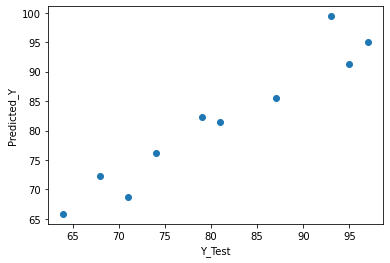

In [35]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')